In [423]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util

import torch
from transformers import BertTokenizer, BertForMaskedLM, BertModel, AutoModelForMaskedLM, AdamW

from tqdm import tqdm 
from sklearn.manifold import TSNE

from matplotlib import pyplot as plt
import seaborn as sns

from typing import Union

In [7]:
knowledge_df = pd.read_excel('../onet_competencies/knowledge_competencies.xlsx', skiprows=3)

In [139]:
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

In [11]:
sentences = knowledge_df['Element Description'].to_list()

In [12]:
cleaned_sentences = [sentence.replace('Knowledge of ', '') for sentence in sentences]

In [355]:
#Encode all sentences
embeddings = sbert_model.encode(cleaned_sentences)

#Compute cosine similarity between all pairs
cos_sim = util.cos_sim(embeddings, embeddings)

#Add all pairs to a list with their cosine similarity score
all_sentence_combinations = []
for i in range(len(cos_sim)-1):
    for j in range(i+1, len(cos_sim)):
        all_sentence_combinations.append([cos_sim[i][j], i, j])

#Sort list by the highest cosine similarity score
all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

print("Top-5 most similar pairs:")
for score, i, j in all_sentence_combinations[0:5]:
    print("{}:{} - {} \t {} \t {:.4f}".format(knowledge_df.iloc[i]['Element Name'], knowledge_df.iloc[j]['Element Name'], cleaned_sentences[i], cleaned_sentences[j], cos_sim[i][j]))

Top-5 most similar pairs:
English Language:Foreign Language - the structure and content of the English language including the meaning and spelling of words, rules of composition, and grammar. 	 the structure and content of a foreign (non-English) language including the meaning and spelling of words, rules of composition and grammar, and pronunciation. 	 0.8309
Business and Management:Administration and Management - principles and facts related to business administration and accounting, human and material resource management in organizations, sales and marketing, economics, and office information and organizing systems 	 business and management principles involved in strategic planning, resource allocation, human resources modeling, leadership technique, production methods, and coordination of people and resources. 	 0.7310
Manufacturing and Production:Production and Processing - principles and facts related to the production, processing, storage, and distribution of manufactured and ag

In [361]:
knowledge_df.iloc[16]

Element ID                                                                                      2.C.4
Element Name                                                                  Mathematics and Science
Element Description                                 Knowledge of the history, theories, methods, a...
Synonym (Source: My Next Move Easy Read Content)                                     Math and Science
O*NET Database Occupation Linkages                                                                NaN
Name: 16, dtype: object

In [379]:
util.cos_sim(embeddings[0],embeddings[1])

tensor([[0.7310]])

In [360]:
np.sum(embeddings[1] - embeddings[16])

0.04949662

In [357]:
np.matmul(embeddings[16],embeddings[31])

0.3187082

In [ ]:
knowledge_df['Element Name']

## Bert

In [524]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_mlm_model = BertForMaskedLM.from_pretrained('bert-base-uncased', output_hidden_states = True)

In [143]:
inputs = tokenizer(cleaned_sentences, return_tensors='pt', max_length=200, truncation=True, padding='max_length')

In [144]:
inputs

{'input_ids': tensor([[ 101, 6481, 1998,  ...,    0,    0,    0],
        [ 101, 2449, 1998,  ...,    0,    0,    0],
        [ 101, 3831, 1998,  ...,    0,    0,    0],
        ...,
        [ 101, 6726, 1010,  ...,    0,    0,    0],
        [ 101, 2865, 2537,  ...,    0,    0,    0],
        [ 101, 6481, 1998,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [145]:
tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

['[CLS]',
 'principles',
 'and',
 'facts',
 'related',
 'to',
 'business',
 'administration',
 'and',
 'accounting',
 ',',
 'human',
 'and',
 'material',
 'resource',
 'management',
 'in',
 'organizations',
 ',',
 'sales',
 'and',
 'marketing',
 ',',
 'economics',
 ',',
 'and',
 'office',
 'information',
 'and',
 'organizing',
 'systems',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',

In [146]:
inputs['labels'] = inputs.input_ids.detach().clone()

In [147]:
inputs['labels']

tensor([[ 101, 6481, 1998,  ...,    0,    0,    0],
        [ 101, 2449, 1998,  ...,    0,    0,    0],
        [ 101, 3831, 1998,  ...,    0,    0,    0],
        ...,
        [ 101, 6726, 1010,  ...,    0,    0,    0],
        [ 101, 2865, 2537,  ...,    0,    0,    0],
        [ 101, 6481, 1998,  ...,    0,    0,    0]])

In [148]:
# create random array of floats with equal dimensions to input_ids tensor
rand = torch.rand(inputs.input_ids.shape)
# create mask array
mask_arr = (rand < 0.15) * (inputs.input_ids != 101) * \
           (inputs.input_ids != 102) * (inputs.input_ids != 0)

In [149]:
selection = []

for i in range(inputs.input_ids.shape[0]):
    selection.append(
        torch.flatten(mask_arr[i].nonzero()).tolist()
    )

In [150]:
for i in range(inputs.input_ids.shape[0]):
    inputs.input_ids[i, selection[i]] = 103

In [151]:
tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

['[CLS]',
 '[MASK]',
 'and',
 '[MASK]',
 'related',
 'to',
 'business',
 '[MASK]',
 'and',
 'accounting',
 ',',
 'human',
 'and',
 '[MASK]',
 'resource',
 'management',
 'in',
 'organizations',
 ',',
 'sales',
 'and',
 'marketing',
 '[MASK]',
 'economics',
 '[MASK]',
 'and',
 'office',
 'information',
 'and',
 'organizing',
 'systems',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '

In [152]:
class MeditationsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings
    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    def __len__(self):
        return len(self.encodings.input_ids)

In [153]:
dataset = MeditationsDataset(inputs)

In [154]:
dataset

In [155]:
loader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)

In [156]:
loader

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# and move our model over to the selected device
bert_mlm_model.to(device)

In [159]:
# activate training mode
bert_mlm_model.train()
# initialize optimizer
optim = AdamW(bert_mlm_model.parameters(), lr=5e-5)

/Users/bryanadams/Desktop/AY_2023/CSI_772/csi_772_course_project/.venv/lib/python3.11/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [161]:
epochs = 2

for epoch in range(epochs):
    # setup loop with TQDM and dataloader
    loop = tqdm(loader, leave=True)
    for batch in loop:
        # initialize calculated gradients (from prev step)
        optim.zero_grad()
        # pull all tensor batches required for training
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        # process
        outputs = bert_mlm_model(input_ids, attention_mask=attention_mask,
                        labels=labels)
        # extract loss
        loss = outputs.loss
        # calculate loss for every parameter that needs grad update
        loss.backward()
        # update parameters
        optim.step()
        # print relevant info to progress bar
        loop.set_description(f'Epoch {epoch}')
        loop.set_postfix(loss=loss.item())

  0%|          | 0/3 [00:00<?, ?it/s]

/var/folders/9l/1xgvrcy5545b3kwy8sbpb_7h0000gn/T/ipykernel_51360/81523791.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 1: 100%|██████████| 3/3 [01:12<00:00, 24.26s/it, loss=6.74]


In [272]:
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

In [332]:
def mean_vector(model_output):
    token_embeddings = model_output[0]
    sum = token_embeddings[0][0]
    for i in token_embeddings[0][1:]:
        sum +=i
    mean_pool = sum/len(token_embeddings[0])
    return np.array(mean_pool)

In [330]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_mean_pooled_embeddings = []
for sentence in cleaned_sentences:
    # encoded sentence
    encoded_input = tokenizer(sentence, return_tensors="pt")

    with torch.no_grad():
        output = bert_mlm_model(**encoded_input)

    response = mean_pooling(output.hidden_states, encoded_input['attention_mask'])

    bert_mean_pooled_embeddings.append(np.array(response[0]))

### Top five closest

In [365]:
np.dot(bert_mean_pooled_embeddings[0],bert_mean_pooled_embeddings[1])

27.172771

In [363]:
util.cos_sim(bert_mean_pooled_embeddings[0],bert_mean_pooled_embeddings[1])

tensor([[0.8590]])

In [338]:
cos_sim = util.cos_sim(bert_mean_pooled_embeddings, bert_mean_pooled_embeddings)

#Add all pairs to a list with their cosine similarity score
all_sentence_combinations = []
for i in range(len(cos_sim)-1):
    for j in range(i+1, len(cos_sim)):
        all_sentence_combinations.append([cos_sim[i][j], i, j])

#Sort list by the highest cosine similarity score
all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

print("Top-5 most similar pairs:")
for score, i, j in all_sentence_combinations[0:5]:
    print("{}:{} - {} \t {} \t {:.4f}".format(knowledge_df.iloc[i]['Element Name'], knowledge_df.iloc[j]['Element Name'], cleaned_sentences[i], cleaned_sentences[j], cos_sim[i][j]))

Top-5 most similar pairs:
English Language:Foreign Language - the structure and content of the English language including the meaning and spelling of words, rules of composition, and grammar. 	 the structure and content of a foreign (non-English) language including the meaning and spelling of words, rules of composition and grammar, and pronunciation. 	 0.9412
Physics:Geography - Knowledge and prediction of physical principles, laws, their interrelationships, and applications to understanding fluid, material, and atmospheric dynamics, and mechanical, electrical, atomic and sub-atomic structures and processes. 	 principles and methods for describing the features of land, sea, and air masses, including their physical characteristics, locations, interrelationships, and distribution of plant, animal, and human life. 	 0.8728
Chemistry:Geography - the chemical composition, structure, and properties of substances and of the chemical processes and transformations that they undergo. This inclu

/Users/bryanadams/Desktop/AY_2023/CSI_772/csi_772_course_project/.venv/lib/python3.11/site-packages/sentence_transformers/util.py:36: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:264.)
  a = torch.tensor(a)


In [333]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
custom_bert_mean_pooled_embeddings = []
for sentence in cleaned_sentences:
    # encoded sentence
    encoded_input = tokenizer(sentence, return_tensors="pt")

    with torch.no_grad():
        output = bert_mlm_model(**encoded_input)

    response = mean_vector(output.hidden_states)

    custom_bert_mean_pooled_embeddings.append(response)

In [339]:
cos_sim = util.cos_sim(custom_bert_mean_pooled_embeddings, custom_bert_mean_pooled_embeddings)

#Add all pairs to a list with their cosine similarity score
all_sentence_combinations = []
for i in range(len(cos_sim)-1):
    for j in range(i+1, len(cos_sim)):
        all_sentence_combinations.append([cos_sim[i][j], i, j])

#Sort list by the highest cosine similarity score
all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

print("Top-5 most similar pairs:")
for score, i, j in all_sentence_combinations[0:5]:
    print("{}:{} - {} \t {} \t {:.4f}".format(knowledge_df.iloc[i]['Element Name'], knowledge_df.iloc[j]['Element Name'], cleaned_sentences[i], cleaned_sentences[j], cos_sim[i][j]))

Top-5 most similar pairs:
English Language:Foreign Language - the structure and content of the English language including the meaning and spelling of words, rules of composition, and grammar. 	 the structure and content of a foreign (non-English) language including the meaning and spelling of words, rules of composition and grammar, and pronunciation. 	 0.9441
Physics:Geography - Knowledge and prediction of physical principles, laws, their interrelationships, and applications to understanding fluid, material, and atmospheric dynamics, and mechanical, electrical, atomic and sub-atomic structures and processes. 	 principles and methods for describing the features of land, sea, and air masses, including their physical characteristics, locations, interrelationships, and distribution of plant, animal, and human life. 	 0.8701
Engineering and Technology:Chemistry - the practical application of engineering science and technology. This includes applying principles, techniques, procedures, and 

In [162]:
my_sentence = "principles and facts related to business administration and accounting, human and material resource management in organizations, sales and marketing, economics, and office information and organizing systems"

In [163]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [164]:
encoded_input = tokenizer(my_sentence, return_tensors="pt")

In [165]:
with torch.no_grad():
    output = bert_mlm_model(**input_ids)

In [177]:
final_layer = output.hidden_states[0][0]

In [168]:
len(final_layer)

32

In [172]:
len(final_layer[0])

768

In [268]:
response = mean_pooling(output.hidden_states, input_ids['attention_mask'])

In [271]:
output.hidden_states[0]

tensor([[[ 0.0000, -0.3177, -0.3685,  ..., -0.0323,  0.0476,  0.1863],
         [ 0.1801,  0.0735, -0.0000,  ..., -0.1068, -0.1072,  0.4067],
         [-0.4803,  0.0000, -0.0774,  ...,  0.5043,  0.0000,  0.4053],
         ...,
         [-0.0000,  0.5065, -0.1220,  ...,  0.7203,  0.7732,  0.8662],
         [-0.0000,  1.2863, -0.4189,  ..., -0.6126, -0.0106,  0.4897],
         [-0.0000,  0.0768,  0.4301,  ..., -0.6230, -0.0739, -0.2669]]])

In [269]:
len(response[0])

768

In [255]:
final_layer.size()

torch.Size([32, 768])

## Projecting into 2D for comparison

In [470]:
tsne = TSNE(random_state=0, n_iter=1000)
tsne_results = tsne.fit_transform(embeddings)
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])


In [471]:
df_tsne['knowledge_name'] = knowledge_df['Element Name']

In [239]:
def classify_knowledge(value:str):
    knowledge_map_dict = {'2.C.10':'Transportation',
                        '2.C.1':'Business',
                        '2.C.2':'Manufacturing',
                        '2.C.3':'Engineering',
                        '2.C.4':'Mathematics',
                        '2.C.5':'Health Services',
                        '2.C.6':'Education',
                        '2.C.7':'Arts and Humanities',
                        '2.C.8':'Law',
                        '2.C.9':'Communications'
                        }
    for key in knowledge_map_dict.keys():
        if key in value:
            return knowledge_map_dict[key]


In [472]:
df_tsne['knowledge_cat'] = knowledge_df['Element ID'].apply(classify_knowledge)

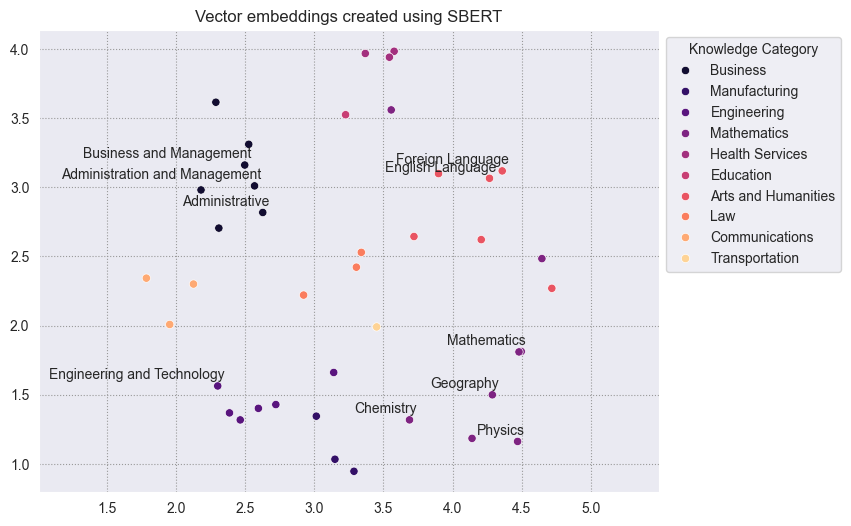

In [473]:
fig, ax = plt.subplots(figsize=(8,6)) # Set figsize
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='knowledge_cat', palette='magma')
plt.legend(title = 'Knowledge Category')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
locations = [0,1,2,17,18,19,10,23,29,30]
for loc in locations:
    plt.annotate(df_tsne.iloc[loc]['knowledge_name'], 
                 (df_tsne.iloc[loc]['TSNE1'], df_tsne.iloc[loc]['TSNE2']), 
                 textcoords="offset points", xytext = (5,5), ha='right')
plt.title('Vector embeddings created using SBERT')
plt.xlabel('')
plt.ylabel('')
plt.axis('equal')
plt.show()

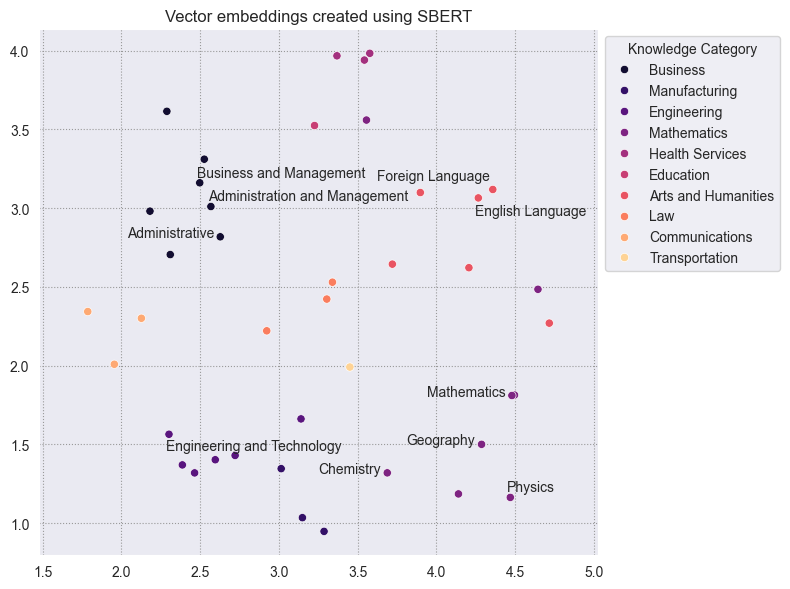

In [491]:
fig, ax = plt.subplots(figsize=(8,6)) # Set figsize
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='knowledge_cat', palette='magma')
plt.legend(title = 'Knowledge Category')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
locations = [0,1,2,17,18,19,10,23,29,30]
for loc in locations:
    if loc in [29]:
        h_pos = 'left'
        v_pos = 'top'
        xy_text = (df_tsne.iloc[loc]['TSNE1'] - .02,df_tsne.iloc[loc]['TSNE2'] - .04)
    elif loc in [30]:
        h_pos = 'right'
        v_pos = 'bottom'
        xy_text = (df_tsne.iloc[loc]['TSNE1'] - .02,df_tsne.iloc[loc]['TSNE2'] + .04)
    elif loc in [18]:
        h_pos = 'left'
        v_pos = 'bottom'
        xy_text = (df_tsne.iloc[loc]['TSNE1'] - .02,df_tsne.iloc[loc]['TSNE2'] + .02)
    elif loc in [10]:
        h_pos = 'left'
        v_pos = 'top'
        xy_text = (df_tsne.iloc[loc]['TSNE1'] - .02,df_tsne.iloc[loc]['TSNE2'] - .03)
    elif loc in [0,1]:
        h_pos = 'left'
        v_pos = 'bottom'
        xy_text = (df_tsne.iloc[loc]['TSNE1'] - .02,df_tsne.iloc[loc]['TSNE2'] + .02)
    else:
        h_pos = 'right'
        v_pos = 'bottom'
        xy_text = (df_tsne.iloc[loc]['TSNE1'] - .04,df_tsne.iloc[loc]['TSNE2'] - .02)
    plt.annotate(df_tsne.iloc[loc]['knowledge_name'], 
                 (df_tsne.iloc[loc]['TSNE1'], df_tsne.iloc[loc]['TSNE2']),
                  xytext=xy_text, ha=h_pos, va=v_pos)
plt.title('Vector embeddings created using SBERT')
plt.xlabel('')
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.savefig('../plots/base_sbert.png')
plt.show()

## Mean pooled tuned BERT

In [492]:
tsne_results = tsne.fit_transform(np.array(bert_mean_pooled_embeddings, dtype=np.float32))
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['knowledge_name'] = knowledge_df['Element Name']
df_tsne['knowledge_cat'] = knowledge_df['Element ID'].apply(classify_knowledge)

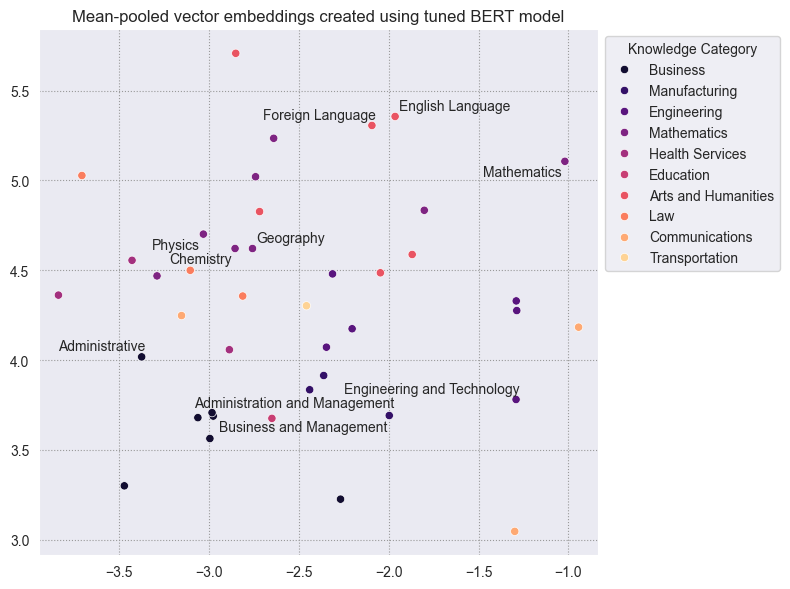

In [499]:
fig, ax = plt.subplots(figsize=(8,6)) # Set figsize
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='knowledge_cat', palette='magma')
plt.legend(title = 'Knowledge Category')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
locations = [0,1,2,17,18,19,10,23,29,30]
for loc in locations:
    if loc in [0]:
        h_pos = 'left'
        v_pos = 'top'
        xy_text = (df_tsne.iloc[loc]['TSNE1'] + .03,df_tsne.iloc[loc]['TSNE2'] - .02)
    elif loc in [1]:
        h_pos = 'left'
        v_pos = 'bottom'
        xy_text = (df_tsne.iloc[loc]['TSNE1'] - .02,df_tsne.iloc[loc]['TSNE2'] + .04)
    elif loc in [2]:
        h_pos = 'right'
        v_pos = 'bottom'
        xy_text = (df_tsne.iloc[loc]['TSNE1'] + .02,df_tsne.iloc[loc]['TSNE2'] + .02)
    elif loc in [10]:
        h_pos = 'right'
        v_pos = 'bottom'
        xy_text = (df_tsne.iloc[loc]['TSNE1'] + .02,df_tsne.iloc[loc]['TSNE2'] + .02)
    elif loc in [23]: # Geography
        h_pos = 'left'
        v_pos = 'bottom'
        xy_text = (df_tsne.iloc[loc]['TSNE1'] + .02,df_tsne.iloc[loc]['TSNE2'] + .02)
    elif loc in [29]: # English
        h_pos = 'left'
        v_pos = 'bottom'
        xy_text = (df_tsne.iloc[loc]['TSNE1'] + .02,df_tsne.iloc[loc]['TSNE2'] + .02)
    elif loc in [30]: # FL
        h_pos = 'right'
        v_pos = 'bottom'
        xy_text = (df_tsne.iloc[loc]['TSNE1'] + .02,df_tsne.iloc[loc]['TSNE2'] + .02)
    else:
        h_pos = 'right'
        v_pos = 'top'
        xy_text = (df_tsne.iloc[loc]['TSNE1'] - .02,df_tsne.iloc[loc]['TSNE2'] - .02)
    plt.annotate(df_tsne.iloc[loc]['knowledge_name'], 
                 (df_tsne.iloc[loc]['TSNE1'], df_tsne.iloc[loc]['TSNE2']),
                  xytext=xy_text, ha=h_pos, va=v_pos)
plt.title('Mean-pooled vector embeddings created using tuned BERT model')
plt.xlabel('')
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.savefig('../plots/tuned_bert.png')
plt.show()

## Based on paper

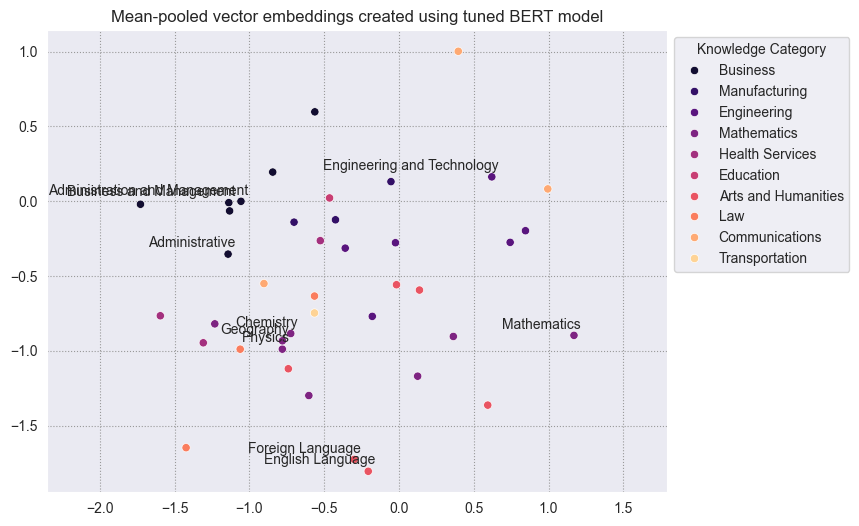

In [343]:
tsne_results = tsne.fit_transform(np.array(custom_bert_mean_pooled_embeddings, dtype=np.float32))
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['knowledge_name'] = knowledge_df['Element Name']
df_tsne['knowledge_cat'] = knowledge_df['Element ID'].apply(classify_knowledge)
fig, ax = plt.subplots(figsize=(8,6)) # Set figsize
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='knowledge_cat', palette='magma')
plt.legend(title = 'Knowledge Category')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
locations = [0,1,2,17,18,19,10,23,29,30]
for loc in locations:
    plt.annotate(df_tsne.iloc[loc]['knowledge_name'], 
                 (df_tsne.iloc[loc]['TSNE1'], df_tsne.iloc[loc]['TSNE2']), 
                 textcoords="offset points", xytext = (5,5), ha='right')
plt.title('Mean-pooled vector embeddings created using tuned BERT model')
plt.xlabel('')
plt.ylabel('')
plt.axis('equal')
plt.show()

## Baseline BERT

In [341]:
not_tuned_bert = BertForMaskedLM.from_pretrained('bert-base-uncased', output_hidden_states = True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [407]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
non_tuned_bert_mean_pooled_embeddings = []
for sentence in cleaned_sentences:
    # encoded sentence
    encoded_input = tokenizer(sentence, return_tensors="pt")

    with torch.no_grad():
        output = not_tuned_bert(**encoded_input)

    response = mean_pooling(output.hidden_states, encoded_input['attention_mask'])

    non_tuned_bert_mean_pooled_embeddings.append(np.array(response[0]))

In [456]:
df_tsne

,TSNE1,TSNE2,knowledge_name,knowledge_cat
0,0.051055,0.039325,Business and Management,Business
1,0.045313,0.058358,Administration and Management,Business
2,-0.296725,0.102057,Administrative,Business
3,0.747185,-0.365354,Economics and Accounting,Business
4,0.054949,-0.032850,Sales and Marketing,Business
5,-0.053406,0.653614,Customer and Personal Service,Business
6,0.126465,0.005292,Personnel and Human Resources,Business
7,0.302164,-1.037950,Manufacturing and Production,Manufacturing
8,0.102983,-0.713853,Production and Processing,Manufacturing
9,0.182285,-0.521514,Food Production,Manufacturing


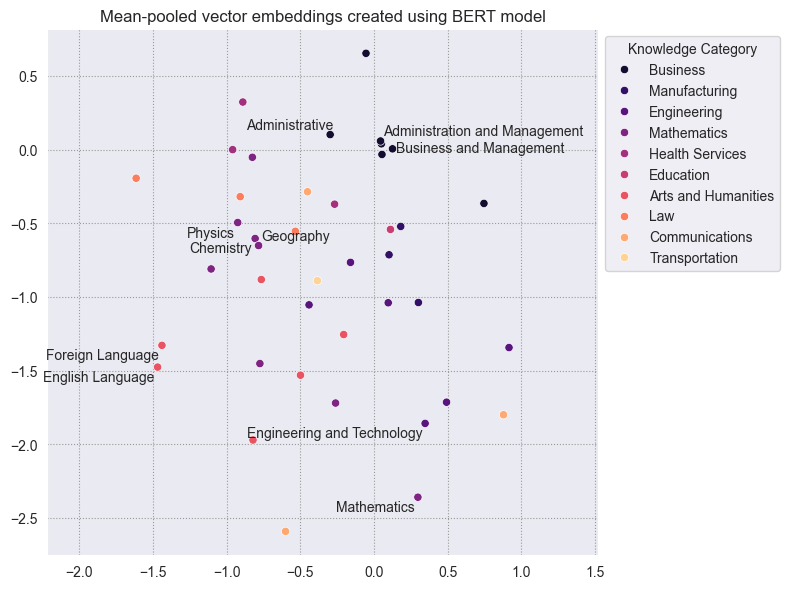

In [500]:
tsne_results = tsne.fit_transform(np.array(non_tuned_bert_mean_pooled_embeddings, dtype=np.float32))
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['knowledge_name'] = knowledge_df['Element Name']
df_tsne['knowledge_cat'] = knowledge_df['Element ID'].apply(classify_knowledge)
fig, ax = plt.subplots(figsize=(8,6)) # Set figsize
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='knowledge_cat', palette='magma')
plt.legend(title = 'Knowledge Category')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
locations = [0,1,2,17,18,19,10,23,29,30]
for loc in locations:
    if loc in [0]:
        h_pos = 'left'
        v_pos = 'top'
        xy_text = (df_tsne.iloc[loc]['TSNE1'] + .1,df_tsne.iloc[loc]['TSNE2'] + .02)
    elif loc in [1]:
        h_pos = 'left'
        v_pos = 'bottom'
        xy_text = (df_tsne.iloc[loc]['TSNE1'] + .02,df_tsne.iloc[loc]['TSNE2'] + .02)
    elif loc in [2]:
        h_pos = 'right'
        v_pos = 'bottom'
        xy_text = (df_tsne.iloc[loc]['TSNE1'] + .02,df_tsne.iloc[loc]['TSNE2'] + .02)
    elif loc in [23]: # Geography
        h_pos = 'left'
        v_pos = 'bottom'
        xy_text = (df_tsne.iloc[loc]['TSNE1'] + .02,df_tsne.iloc[loc]['TSNE2'] + .02)
    else:
        h_pos = 'right'
        v_pos = 'top'
        xy_text = (df_tsne.iloc[loc]['TSNE1'] - .02,df_tsne.iloc[loc]['TSNE2'] - .02)
    plt.annotate(df_tsne.iloc[loc]['knowledge_name'], 
                 (df_tsne.iloc[loc]['TSNE1'], df_tsne.iloc[loc]['TSNE2']),
                  xytext=xy_text, ha=h_pos, va=v_pos)
plt.title('Mean-pooled vector embeddings created using BERT model')
plt.xlabel('')
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.savefig('../plots/base_bert.png')
plt.show()

In [405]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
non_tuned_custom_bert_mean_pooled_embeddings = []
for sentence in cleaned_sentences:
    # encoded sentence
    encoded_input = tokenizer(sentence, return_tensors="pt")

    with torch.no_grad():
        output = not_tuned_bert(**encoded_input)

    response = mean_vector(output.hidden_states)

    non_tuned_custom_bert_mean_pooled_embeddings.append(response)

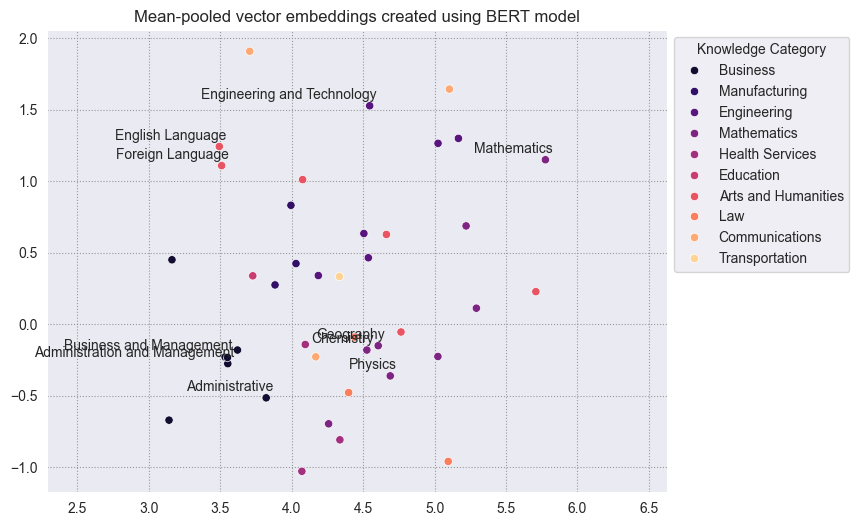

In [406]:
tsne_results = tsne.fit_transform(np.array(non_tuned_custom_bert_mean_pooled_embeddings, dtype=np.float32))
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['knowledge_name'] = knowledge_df['Element Name']
df_tsne['knowledge_cat'] = knowledge_df['Element ID'].apply(classify_knowledge)
fig, ax = plt.subplots(figsize=(8,6)) # Set figsize
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='knowledge_cat', palette='magma')
plt.legend(title = 'Knowledge Category')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
locations = [0,1,2,17,18,19,10,23,29,30]
for loc in locations:
    plt.annotate(df_tsne.iloc[loc]['knowledge_name'], 
                 (df_tsne.iloc[loc]['TSNE1'], df_tsne.iloc[loc]['TSNE2']), 
                 textcoords="offset points", xytext = (5,5), ha='right')
plt.title('Mean-pooled vector embeddings created using BERT model')
plt.xlabel('')
plt.ylabel('')
plt.axis('equal')
plt.show()

In [367]:
np.matmul(embeddings[1],embeddings[2])

0.33590114

In [419]:
pairs = ([0,1],[1,2],[17,18],[12,17],[2,17],[29,30], [17,29])

In [420]:
comparison_dict = {}
count = 0
for pair in pairs:
    comparison_dict[count] = {}
    comparison_dict[count]['element_1'] = knowledge_df.iloc[pair[0]]['Element Name']
    comparison_dict[count]['element_2'] = knowledge_df.iloc[pair[1]]['Element Name']
    comparison_dict[count]['SBERT'] = float(util.cos_sim(embeddings[pair[0]], embeddings[pair[1]]))
    comparison_dict[count]['Tuned BERT mean pooling'] = float(util.cos_sim(bert_mean_pooled_embeddings[pair[0]], bert_mean_pooled_embeddings[pair[1]]))
    # comparison_dict[count]['Tuned BERT custom pooling'] = float(util.cos_sim(custom_bert_mean_pooled_embeddings[pair[0]], custom_bert_mean_pooled_embeddings[pair[1]]))
    comparison_dict[count]['BERT base mean pooling'] = float(util.cos_sim(non_tuned_bert_mean_pooled_embeddings[pair[0]], non_tuned_bert_mean_pooled_embeddings[pair[1]]))
    # comparison_dict[count]['BERT base custom pooling'] = float(util.cos_sim(non_tuned_custom_bert_mean_pooled_embeddings[pair[0]], non_tuned_custom_bert_mean_pooled_embeddings[pair[1]]))
    count+=1

In [424]:
def dataframe_to_latex(
    df: pd.DataFrame, cols_to_round: Union[list, str] = "all", sig_figs: int = 4
) -> str:
    """Takes a dataframe and returns a string for a latex table I use

    Args:
        df (pd.DataFrame): The data you want in a table
        cols_to_round (Union[list, str], optional): Columns you want formated. Defaults to "all".
        sig_figs (int, optional): significant figures you want your floats rounded to. Defaults to 4.

    Returns:
        str: latex string for your table
    """
    # Format DataFrame with 4 significant digits and center-align values
    # TODO, have this be specified columns
    df = df.copy()
    if cols_to_round == "all":
        formatted_df = df.map(lambda x: f"{x:.{sig_figs}f}")

    else:
        for i in cols_to_round:
            df[i] = df[i].map(lambda x: f"{x:.{sig_figs}f}")
        formatted_df = df

    column_format = ""
    for i in range(1, df.shape[1] + 1):
        column_format += "c"

    # Convert formatted DataFrame to LaTeX table with centered values
    latex_table = formatted_df.to_latex(
        escape=False, index=False, header=True, column_format=column_format
    )

    # Replace \midrule and \bottomrule with \Xhline
    latex_table = (
        latex_table.replace("\\toprule", "\\Xhline{3\\arrayrulewidth}")
        .replace("\\bottomrule", "\\Xhline{3\\arrayrulewidth}")
        .replace("\\midrule\n", "")
    )

    # Keep the \hline after the header
    latex_table = latex_table.replace("\\\\\n", "\\\\\\hline\n", 1)

    return latex_table

In [427]:
latex_table = dataframe_to_latex(pd.DataFrame(comparison_dict).T, cols_to_round=['SBERT','Tuned BERT mean pooling', 'BERT base mean pooling'], sig_figs=3)

In [428]:
print(latex_table)

\begin{tabular}{ccccc}
\Xhline{3\arrayrulewidth}
element_1 & element_2 & SBERT & Tuned BERT mean pooling & BERT base mean pooling \\\hline
Business and Management & Administration and Management & 0.731 & 0.859 & 0.865 \\
Administration and Management & Administrative & 0.336 & 0.759 & 0.782 \\
Mathematics & Physics & 0.264 & 0.719 & 0.742 \\
Engineering and Technology & Mathematics & 0.277 & 0.727 & 0.732 \\
Administrative & Mathematics & 0.203 & 0.702 & 0.722 \\
English Language & Foreign Language & 0.831 & 0.941 & 0.965 \\
Mathematics & English Language & 0.170 & 0.706 & 0.724 \\
\Xhline{3\arrayrulewidth}
\end{tabular}



In [501]:
pd.DataFrame(comparison_dict).T

,element_1,element_2,SBERT,Tuned BERT mean pooling,BERT base mean pooling
0,Business and Management,Administration and Management,0.730976,0.859005,0.865122
1,Administration and Management,Administrative,0.335901,0.758617,0.782404
2,Mathematics,Physics,0.26403,0.719453,0.741762
3,Engineering and Technology,Mathematics,0.277431,0.727268,0.732481
4,Administrative,Mathematics,0.203183,0.702301,0.722361
5,English Language,Foreign Language,0.830945,0.941173,0.964715
6,Mathematics,English Language,0.170312,0.706008,0.723823


In [512]:
import tensorflow as tf
from tensorflow_text import WordpieceTokenizer

In [519]:
tokenizer = WordpieceTokenizer('../uncased_L-12_H-768_A-12/vocab.txt')

In [520]:
tokenizer.tokenize(list(cleaned_sentences[0].split(' ')))

<tf.RaggedTensor [[6481], [1998], [8866], [3141], [2000], [2449], [3447], [1998],
 [9529, 29623], [2529], [1998], [3430], [7692], [2968], [1999],
 [4411, 29623], [4341], [1998], [5821, 29623], [5543, 29623], [1998],
 [2436], [2592], [1998], [10863], [3001]]>

In [528]:
test_tokenizor = BertTokenizer.from_pretrained('../uncased_L-12_H-768_A-12/vocab.txt')

In [529]:
test_tokenizor.convert_ids_to_tokens(test_tokenizor(cleaned_sentences[0])['input_ids'])

['[CLS]',
 'principle',
 '##s',
 'and',
 'facts',
 'related',
 'to',
 'business',
 'administration',
 'and',
 'accounting',
 ',',
 'human',
 'and',
 'material',
 'resource',
 'management',
 'in',
 'organizations',
 ',',
 'sales',
 'and',
 'marketing',
 ',',
 'economics',
 ',',
 'and',
 'office',
 'information',
 'and',
 'organizing',
 'systems',
 '[SEP]']